In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
data = pd.read_csv('insti_mood.csv')

In [48]:
data.X1.fillna(3, inplace = True)
data.X2.fillna(3, inplace = True)
data.X3.fillna(3, inplace = True)
data.X4.fillna(2, inplace = True)
data.X5.fillna(3, inplace = True)
data.Y.fillna(3, inplace = True)

In [49]:
data.replace(["Poor", "Not sure", "Decent", "Good"], [1, 2, 3, 4], inplace=True)

In [50]:
data

,X1,X2,X3,X4,X5,Y
0,How pleasant is the family atmosphere at your ...,How favorable is the study and work environmen...,How satisfied are you with your daily routine?,"Over the past couple of months, how has your q...",How productive are you?,How would you rate your mental health?
1,1,1,1,1,3,1
2,3,3,3,2,3,3
3,1,1,1,1,3,2
4,3,4,3,4,2,5
...,...,...,...,...,...,...
1302,3,4,2,1,2,1
1303,5,5,3,4,3,4
1304,4,3,3,3,2,3
1305,4,4,4,3,4,5


In [51]:
data.drop(0, inplace = True)

# Now data is clean .

In [53]:
y3 = data.loc[:,"Y"]

In [54]:
y2 = y3.to_list()

In [55]:
y1 = np.array(y2)
y = y1.astype(float)

In [56]:
data1 = data.drop(columns=['Y'])
X2 = data1.values.tolist()

In [57]:
X1 = np.array(X2)
X = X1.astype(float)

In [58]:
# full data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [59]:
y_pred1=knn1.predict(X)
print(metrics.accuracy_score(y, y_pred1))

0.6263399693721287


In [60]:
logreg = LogisticRegression(solver='liblinear')

logreg.fit(X, y)

y_predlog=logreg.predict(X)
print(metrics.accuracy_score(y, y_predlog))

# full data over

0.4686064318529862


In [61]:
# train-cross_validation-test
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.4, random_state=3)
X_cv, X_test, y_cv, y_test = train_test_split(X_test1, y_test1, test_size=0.5, random_state=3)

# splitting as 60-20-20

In [62]:
'''
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_cv)
print(metrics.accuracy_score(y_cv, y_pred))
'''

'\nknn = KNeighborsClassifier(n_neighbors=1)\nknn.fit(X_train, y_train)\ny_pred=knn.predict(X_cv)\nprint(metrics.accuracy_score(y_cv, y_pred))\n'

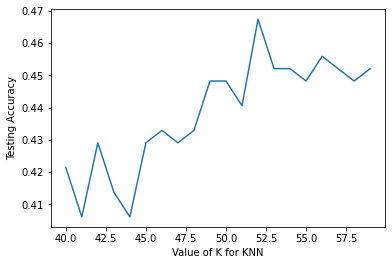

In [80]:
k_range = list(range(40, 60))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_cv)
    scores.append(metrics.accuracy_score(y_cv, y_pred))

%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# maximum accuracy model

In [81]:
knn2 = KNeighborsClassifier(n_neighbors=52)
knn2.fit(X_train, y_train)
y_pred2=knn2.predict(X_cv)
print(metrics.accuracy_score(y_cv, y_pred2))

0.4674329501915709


In [65]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
y_predsvm=knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_predsvm))

0.4541984732824427


In [66]:
# finding missing values
dat = pd.read_csv('insti_mood.csv')
dat.drop(0, inplace = True)
dat.X1.value_counts()

4    421
5    305
3    257
2    112
1     68
Name: X1, dtype: int64

# missing value counts

In [67]:
dat[pd.isnull(dat.X1)].shape

(143, 6)

In [68]:
dat[pd.isnull(dat.X2)].shape

(139, 6)

In [69]:
dat[pd.isnull(dat.X3)].shape

(17, 6)

In [70]:
dat[pd.isnull(dat.X4)].shape

(13, 6)

In [71]:
dat[pd.isnull(dat.X5)].shape

(21, 6)

In [72]:
dat[pd.isnull(dat.Y)].shape

(12, 6)